# COMP3222/6246 Machine Learning Technologies (2018/19)
# Week 2 – Basics of Machine Learning project

In this week, we will have an overview of how a practical Machine Learning project works. We aim to familiarise you with the general procedure of doing Machine Learning, while encouraging you to develop your critical thinking by asking you some questions now and then. 

In general, a Machine Learning project is not different from a software project, where you might want to go back and forth and tweak something, or roll out the first prototype and improve on it incrementally. Answering the questions will help you understand more, and allow you to come up with an idea for improving the Machine Learning prototype we introduced here.

Note that you will not learn by simply executing this notebook without playing with it :)

## Defining the problem

Say, we are given a task to **predict a house price in California**. Depending on a dataset, this can be either a *supervised learning*, *reinforcement learning*, and so on. Clearly, we need to inspect the dataset first.

## Getting the dataset

We will use 1990 California consus data which is provided by Aurélien Géron on his Github: https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz. The description of this dataset is provided on https://github.com/ageron/handson-ml/blob/master/datasets/housing/README.md and http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html.

In [1]:
import urllib # This is URL handling module required for downloading files from the Internet

urllib.request.urlretrieve("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz", "housing.tgz")

('housing.tgz', <http.client.HTTPMessage at 0x28caae21908>)

In [2]:
import tarfile # This is used for decompressing .tgz file

housing_tgz = tarfile.open("housing.tgz")
housing_tgz.extractall()
housing_tgz.close()

The *housing.tgz* file should be decompressed and saved on the current working directory as *housing.csv*.

## Exploring the dataset

Now, we should familiarise ourselves with the dataset. For example, you should know what kind of attributes (*numerical* or *categorical*?), how many datapoints, how many missing values, is it raw data or transformed data, and so forth. 

Note that, usually, a dataset that you will acquire in the real world cannot be used right away. You will need to perform *data cleaning* beforehand.

In [3]:
import pandas # This is a library that is mainly used for data manipulation and some basic analyses

housing = pandas.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

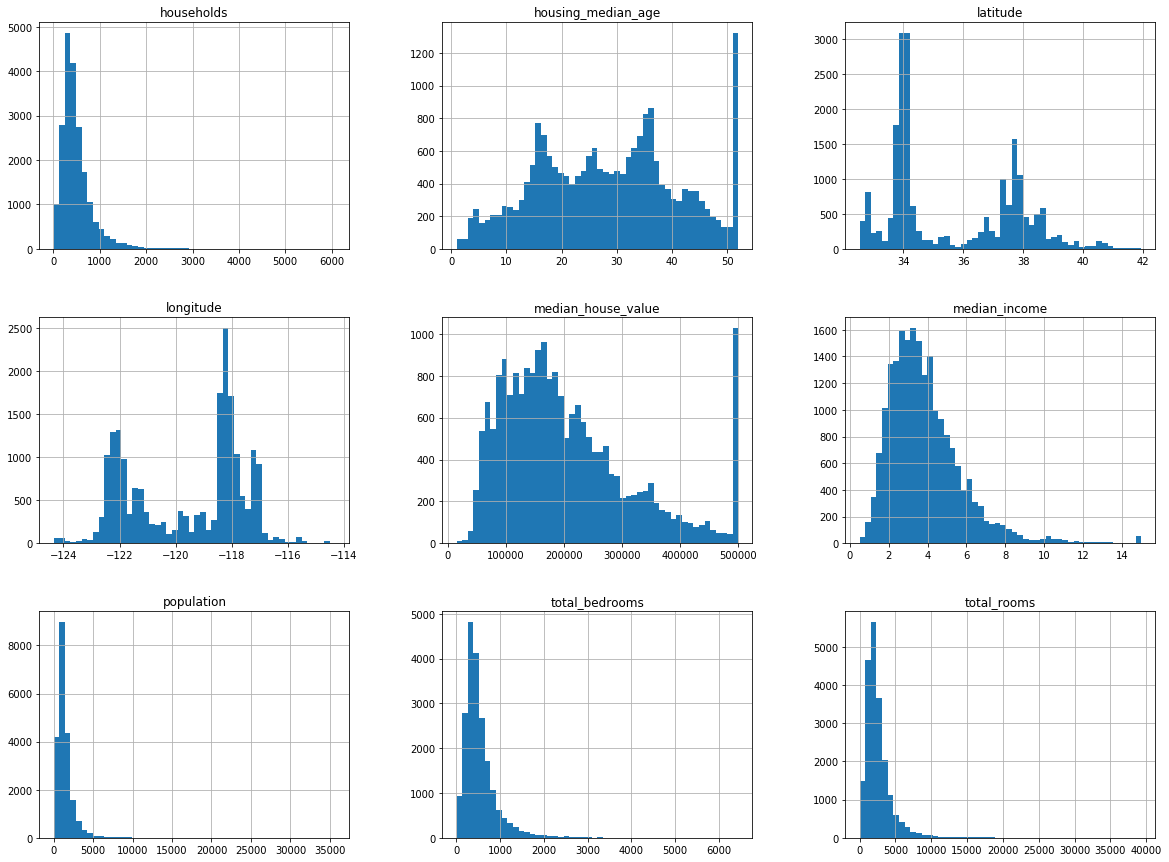

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt # This is for making a plot similar to one in MATLAB
housing.hist(bins=50, figsize=(20,15)) # Do you know why we choose 50 bins? Try playing with the number of bins and observe the difference.
plt.show()

What can we say about our dataset after this quick glance over it? What is the name of the variable that we need to predict with our Machine Learning technique? How many attributes or features do we have? Which attributes are numerical and which are not? Are there any missing values in the dataset? Is there any anomaly or outlier in the distribution of the attributes (shown in histogram)?

The more we know about our dataset, the less problems we will have later.

## Defining the problem and a performance measure

After we have roughly explored the dataset, we now know that we need to solve a supervised-learning multivariate regression task, where we will use a Machine Learning algorithm **to predict *median_house_value* based on other attributes**. With this knowledge, you will be able to select a number of appropriate algorithms later.

Moreover, we can pick a performance measure of our Machine Learning algorithm beforehand. There are a number of performance measures for regression task, but we will just use the Root Mean Square Error (RMSE) for now.

$$\text{RMSE} \left( \mathbf{Y} , \mathbf{\hat{Y}} \right) = \sqrt{\frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y_i} \right)^2 } $$

where $\mathbf{Y}$ and $\mathbf{\hat{Y}}$ are an $n$-sized vector of true values and an $n$-sized vector of predicted values which comprises of $y_i$ and $\hat{y_i}$ respectively for each datapoint $i$. In other words, RMSE is computed from a square root of an average squared error.

Another well-known performance measure is the Mean Absolute Error (MAE), which is computed by taking an average of an absolute value of the error.

$$\text{MAE} \left( \mathbf{Y} , \mathbf{\hat{Y}} \right) = \frac{1}{n} \sum_{i=1}^n | y_i - \hat{y_i} | $$

Both of them are good measures of how well our Machine Learning algorithm will perform. The lower the value is, the better our algorithm performs. However, different measures will pick up different aspects in the error that our Machine Learning produced. Now, what is the difference between the RMSE and the MAE in this regard? Which one would be appropriate for this house price prediction task? Why?

## Data cleaning: missing values and capped values

By exploring our dataset, we are aware of at least 2 problems: namely, missing values and capped values. In particular, the attribute total_bedrooms has a number of values smaller than the other attributes, and there is a peak in the distribution of the attributes housing_median_age and median_house_value, which signifies a limit on the attribute's maximum value. These might be caused by how the data was collected; e.g. the survey's choice 'Perfer not to say', '>= 52', or '>= 500,001'.

There are a number of ways to solve these issues: we can either (a) discard the attributes, (b) remove the datapoint that have these issues, or (c) replace the attributes with appropriate values. Different methods affect our Machine Learning algorithm in different ways. For examples, our Machine Learning algorithm might not work well if the discarded attributes are the key attributes for accurately predicting house prices. If we discard too many datapoints, our algorithm might not be able to properly learn. Similarly, filling/replacing attributes with incorrect values will also affect our prediction's accuracy.

For the sake of simplicity, let's try removing those corrupted datapoints and see how well our Machine Learning algorithm can do.

In [8]:
fltr_idx = housing['total_bedrooms'].notna() & (housing['housing_median_age'] < 52) & (housing['median_house_value'] < 500001) # retrieve boolean array where each value corresponds to datapoint we want
fltr_housing = housing[fltr_idx].reset_index(drop=True) # select datapoints then reset its index
fltr_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


In [9]:
fltr_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 10 columns):
longitude             18379 non-null float64
latitude              18379 non-null float64
housing_median_age    18379 non-null float64
total_rooms           18379 non-null float64
total_bedrooms        18379 non-null float64
population            18379 non-null float64
households            18379 non-null float64
median_income         18379 non-null float64
median_house_value    18379 non-null float64
ocean_proximity       18379 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [10]:
fltr_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000
mean,-119.484954,35.593833,26.969422,2669.597965,548.003972,1469.890690,508.613145,3.693698,189563.469014
std,1.980713,2.148148,11.433039,2227.810560,429.431372,1163.864204,389.550323,1.569676,95763.629783
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.550000,33.920000,17.000000,1458.000000,300.000000,811.000000,284.000000,2.537000,115400.000000
50%,-118.450000,34.240000,27.000000,2142.000000,442.000000,1203.000000,416.000000,3.470500,171200.000000
75%,-117.970000,37.670000,36.000000,3182.000000,659.000000,1779.000000,614.000000,4.616700,243200.000000
max,-114.310000,41.950000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000


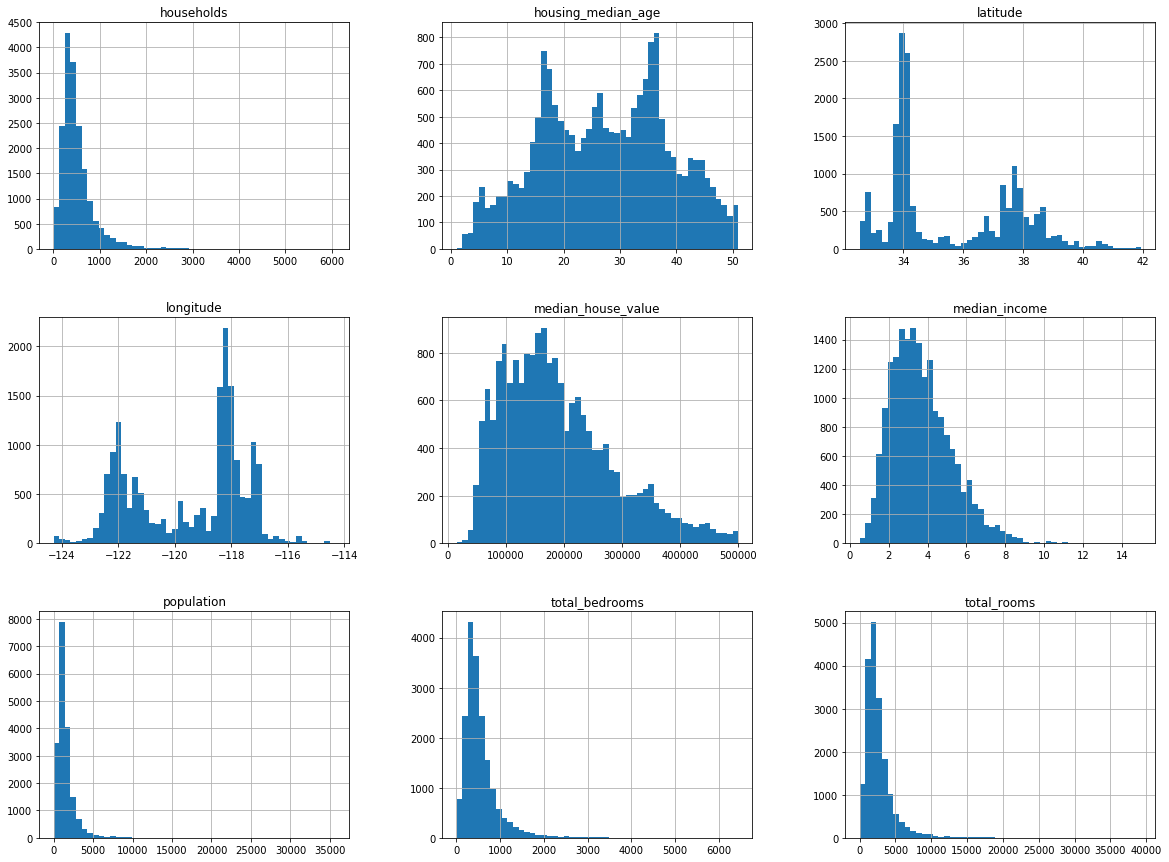

In [11]:
fltr_housing.hist(bins=50, figsize=(20,15)) # Do you know why we choose 50 bins? Try playing with the number of bins and observe the difference.
plt.show()

Now, we have cleaned our dataset by removing those datapoints that have missing values and capped values. Do you think this method is appropriate? Will there be any problem after you have applied Machine Learning algorithm?

## Dealing with categorical attributes

Another issue that should not be ignored is the presence of the categorical attribute 'ocean_proximity'. Since most Machine Learning algorithms work on numerical dataset only, we need to transform the categorical attribute to some numerical value that still represent its original meaning.

In [12]:
from sklearn.preprocessing import OneHotEncoder

encoded_cat, categories = fltr_housing["ocean_proximity"].factorize() # retrieve the attribute encoded as numbers
encoded_cat_arr = OneHotEncoder().fit_transform(encoded_cat.reshape(-1,1)).toarray() # transform sparse matrix to NumPy array
enc_fltr_housing = fltr_housing.iloc[:,0:9].copy()
for i in range(0, len(categories)):
    enc_fltr_housing[categories[i]] = encoded_cat_arr[:,i]
enc_fltr_housing.head()

C:\Local\anaconda3\envs\Comp3222Wk8\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,1.0,0.0,0.0,0.0,0.0
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,1.0,0.0,0.0,0.0,0.0
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,1.0,0.0,0.0,0.0,0.0


We have just finished transforming each categorical value to a vector of binary values. As an alternative, we could have only a single numerical attribute that maps to the categories; e.g. 1 for 'NEAR BAY', 2 for '<1H OCEAN', etc. Compared to having a vector of binary values, what are the pros&cons of this approach? Will there be any problem later if we use this approach?

## Data partitioning: train set and test set

How can we be sure that our Machine Learning algorithm will work in the real world? Since we need to evaluate our algorithm on some datapoints, now it is a good time to set aside a portion of the dataset as a *test set* and the rest as a *training set*. By treating a portion of the dataset as unseen data, you can test how good your Machine Learning algorithm will be likely to perform in the real world.

In [13]:
import numpy

rnd_indices = numpy.random.permutation(len(enc_fltr_housing)) # Generate a random sequence of housing's index
test_set_size = int(len(enc_fltr_housing) * 0.2) 
print(test_set_size, " datapoints for test set")

3675  datapoints for test set


In [14]:
test_indices = rnd_indices[:test_set_size]
train_indices = rnd_indices[test_set_size:]
print(test_indices, " ", len(test_indices))
print(train_indices, " ", len(train_indices))

[ 6389    38  2178 ... 10558  8806 12791]   3675
[ 9528   598 18260 ...  2385  8215  8433]   14704


In [15]:
test_set1 = enc_fltr_housing.iloc[test_indices].reset_index(drop=True) # Pick data out of housing according to the test indices
test_set1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-118.23,33.98,35.0,1366.0,496.0,2160.0,497.0,2.2059,150000.0,0.0,1.0,0.0,0.0,0.0
1,-122.28,37.81,19.0,1207.0,243.0,721.0,207.0,1.1111,108300.0,1.0,0.0,0.0,0.0,0.0
2,-120.44,36.84,29.0,1563.0,293.0,883.0,288.0,2.8182,90500.0,0.0,0.0,1.0,0.0,0.0
3,-122.06,38.25,36.0,1818.0,323.0,953.0,298.0,3.3153,99000.0,0.0,0.0,1.0,0.0,0.0
4,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,0.0,1.0,0.0,0.0,0.0


In [16]:
train_set1 = enc_fltr_housing.iloc[train_indices].reset_index(drop=True)
train_set1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-117.92,33.63,34.0,2479.0,491.0,1131.0,490.0,4.9643,317900.0,0.0,1.0,0.0,0.0,0.0
1,-122.03,37.59,16.0,4371.0,889.0,2530.0,817.0,4.6786,256000.0,1.0,0.0,0.0,0.0,0.0
2,-121.53,38.58,35.0,1316.0,321.0,732.0,336.0,2.1213,79200.0,0.0,0.0,1.0,0.0,0.0
3,-118.18,34.08,35.0,2226.0,602.0,2230.0,549.0,2.9167,129300.0,0.0,1.0,0.0,0.0,0.0
4,-118.64,34.22,25.0,2762.0,410.0,1166.0,439.0,6.8643,333700.0,0.0,1.0,0.0,0.0,0.0


Now, we have just randomly put 20% of total datapoints into a test set and the rest into a training set. Do you think 20% is sufficient? Why should not we have less, so that our Machine Learning algorithm can harness more information from the larger training set? Vice versa, should we have a larger test set, so that we are more confident that our Machine Learning algorithm will perform well in the real world?

## Choose and apply Machine Learning algorithm

After so much work on preparing our dataset, we are ready to try our Machine Learning algorithm. Whilst there are many algorithms or *models* for regression task, let us apply the basic approach first: the Linear Regression algorithm. In many cases, a simple model such as the Linear Regression works perfectly fine. If the simple model is sufficient, then there is no need to apply complex algorithms which could require the tuning of many hyperparameters, larger number of datapoints, or longer time to train.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lnr_regressor1 = LinearRegression()
lnr_regressor1.fit(train_set1.iloc[:, [idx for idx in range(len(train_set1.columns)) if idx != 8]], train_set1['median_house_value'])
prediction1 = lnr_regressor1.predict(test_set1.iloc[:, [idx for idx in range(len(test_set1.columns)) if idx != 8]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set1['median_house_value'], prediction1)))

RMSE =  59352.51293992138


We have just trained a linear regression model based on our training set. Then, we have used it to predict the house price on our test set, and we have computed the RMSE to quantify how good our model is. Clearly, the RMSE we have got is very high. That implies that our Machine Learning algorithm is not performing well enough. Will the RMSE change if we redo everything again? What could have gone wrong? What could be done to improve our accuracy?

## Feature engineering

We have just finished our first prototype, but it doesn't seem to work well. As someone say: 'Garbage in, Garbage out'! So, it could be the case that our dataset is not comprised of useful attributes that are going to help our Machine Learning algorithm to learn and predict well. 

This is quite true if we observe carefully: a value of some attributes such as total_rooms and total_bedrooms represents the whole district/block's! We are predicting the price of one house, but our Machine Learning algorithm is working on district-level data. Obviously, a house with many rooms should be more expensive than a house with a smaller number of rooms. Similar reasoning goes for other attributes as well. Therefore, we should *engineer* our dataset so that it has a larger number of useful attributes or *features*. Let's try this out and see how much our Machine Learning algorithm will improve.

In [18]:
train_set2 = train_set1.copy()
train_set2['room_per_house'] = train_set2['total_rooms']/train_set2['households']
train_set2['bedroom_per_room'] = train_set2['total_bedrooms']/train_set2['total_rooms']
train_set2['pop_per_house'] = train_set2['population']/train_set2['households']
train_set2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,room_per_house,bedroom_per_room,pop_per_house
0,-117.92,33.63,34.0,2479.0,491.0,1131.0,490.0,4.9643,317900.0,0.0,1.0,0.0,0.0,0.0,5.059184,0.198064,2.308163
1,-122.03,37.59,16.0,4371.0,889.0,2530.0,817.0,4.6786,256000.0,1.0,0.0,0.0,0.0,0.0,5.350061,0.203386,3.096695
2,-121.53,38.58,35.0,1316.0,321.0,732.0,336.0,2.1213,79200.0,0.0,0.0,1.0,0.0,0.0,3.916667,0.243921,2.178571
3,-118.18,34.08,35.0,2226.0,602.0,2230.0,549.0,2.9167,129300.0,0.0,1.0,0.0,0.0,0.0,4.054645,0.270440,4.061931
4,-118.64,34.22,25.0,2762.0,410.0,1166.0,439.0,6.8643,333700.0,0.0,1.0,0.0,0.0,0.0,6.291572,0.148443,2.656036


In [19]:
test_set2 = test_set1.copy()
test_set2['room_per_house'] = test_set2['total_rooms']/test_set2['households']
test_set2['bedroom_per_room'] = test_set2['total_bedrooms']/test_set2['total_rooms']
test_set2['pop_per_house'] = test_set2['population']/test_set2['households']
test_set2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,room_per_house,bedroom_per_room,pop_per_house
0,-118.23,33.98,35.0,1366.0,496.0,2160.0,497.0,2.2059,150000.0,0.0,1.0,0.0,0.0,0.0,2.748491,0.363104,4.346076
1,-122.28,37.81,19.0,1207.0,243.0,721.0,207.0,1.1111,108300.0,1.0,0.0,0.0,0.0,0.0,5.830918,0.201326,3.483092
2,-120.44,36.84,29.0,1563.0,293.0,883.0,288.0,2.8182,90500.0,0.0,0.0,1.0,0.0,0.0,5.427083,0.187460,3.065972
3,-122.06,38.25,36.0,1818.0,323.0,953.0,298.0,3.3153,99000.0,0.0,0.0,1.0,0.0,0.0,6.100671,0.177668,3.197987
4,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,0.0,1.0,0.0,0.0,0.0,4.973744,0.212532,2.408676


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lnr_regressor2 = LinearRegression()
lnr_regressor2.fit(train_set2.iloc[:, [idx for idx in range(len(train_set2.columns)) if idx != 8]], train_set2['median_house_value'])
prediction2 = lnr_regressor2.predict(test_set2.iloc[:, [idx for idx in range(len(test_set2.columns)) if idx != 8]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set2['median_house_value'], prediction2)))

RMSE =  59069.755654747634


Whilst the improvement is not that significant, it has shown that *feature engineering* is very useful. There are more techniques than those we have just shown. Could you name some?

## Choose and apply Machine Learning algorithm (again)

It is possible that the Linear Regression model is not powerful enough to learn from our dataset. We could try different regression models: say, the Random Forest Regression. With Scikit-Learn, we can try many different algorithms easily.

In [21]:
from sklearn.ensemble import RandomForestRegressor

frst_regressor1 = RandomForestRegressor()
frst_regressor1.fit(train_set1.iloc[:, [idx for idx in range(len(train_set1.columns)) if idx != 8]], train_set1['median_house_value'])
prediction3 = frst_regressor1.predict(test_set1.iloc[:, [idx for idx in range(len(test_set1.columns)) if idx != 8]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set1['median_house_value'], prediction3)))

C:\Local\anaconda3\envs\Comp3222Wk8\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE =  45543.47086819659


With the Forest Regression model, we have achieved a good improvement on the non-engineered dataset. Now, we could also try it on the engineered dataset.

In [22]:
from sklearn.ensemble import RandomForestRegressor

frst_regressor2 = RandomForestRegressor()
frst_regressor2.fit(train_set2.iloc[:, [idx for idx in range(len(train_set2.columns)) if idx != 8]], train_set2['median_house_value'])
prediction4 = frst_regressor2.predict(test_set2.iloc[:, [idx for idx in range(len(test_set2.columns)) if idx != 8]])
print('RMSE = ', numpy.sqrt(mean_squared_error(test_set2['median_house_value'], prediction4)))

C:\Local\anaconda3\envs\Comp3222Wk8\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE =  47471.84807136839


It seems that the engineered dataset degrades the performance of Random forest regression! This is very unlikely since Random forest regression is more powerful than the linear regression. Is it possible to tune the parameter of a Machine Learning algorithm to achieve better accuracy?

## Recap

We have just demonstrated how to carry out a Machine Learning project on a given dataset. Specifically, a multivariate regression task in a supervised model-based batch learning framework. We have shown that a dataset needs to be properly inspected and some data cleaning techniques performed before applying any Machine Learning algorithm. Significant improvement can be obtained by not only changing the Machine Learning algorithm but combining it with feature engineering. There are a number of things that we have not covered here, but you can learn them by trying our exercises below.

## Exercises

1. What is the difference between RMSE and MAE? What can be implied if RMSE is significantly higher than MAE? Is it true for this house prediction problem? (You can try compute the MAE in the cell below.)

2. Instead of dropping some datapoints that have missing values, we can try and fill them with a median of that attributes. Will the performance measure increase?

(Hint: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

3. What is the consequence of ignoring the datapoints with a capped value in our dataset?

4. Instead of encoding a categorical attribute into a number of binary attributes, will our performance measure increase if we encode it into one attribute with each value representing one category? What could be a reason for such improvement?

(Hint: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.factorize.html)

5. In many dataset including ours, different attributes have different ranges of value. Whilst our Machine Learning algorithm can cope with this issue to certain degree, it is widely known that either standardisation or normalisation should be applied. Try them separately on some attributes in our dataset, and observe any change in the performance measure.

(Hint: http://scikit-learn.org/stable/modules/preprocessing.html)

6. We had randomly partitioned the dataset into the train set and the test set. It might be the case that we were lucky and randomly chose a test set that yielded a very low RMSE. To properly evaluate performance of our Machine Learning algorithm, you should try using all datapoints in your dataset as a test set and make sure that the RMSE is significatly low. This is called 'Cross-Validation.' Try it with our dataset and one Machine Learning model.

(Hint: http://scikit-learn.org/stable/modules/cross_validation.html)

7. Many Machine Learning algorithms including the Random Forest Regression have a number of parameters to tune. Try tuning our Random Forest Regressor so that it achieves the lowest RMSE.

(Hint: http://scikit-learn.org/stable/modules/grid_search.html)

8. In practice, after training your first prototype, you are likely to acquire new datapoints or update your existing datapoints. How can you utilise them to improve your Machine Learning algorithm?